### Import Libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder

### Read dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IoT Network Intrusion Dataset.csv')
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [4]:
tem_df1 = df.copy()
tem_df1

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


### EDA process

In [5]:
tem_df1.describe(include="all")

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
count,625783,625783,625783.000000,625783,625783.000000,625783.000000,625783,625783.000000,625783.000000,625783.00000,...,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783,625783,625783
unique,64064,57985,NaN,478,NaN,NaN,4304,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,9
top,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,NaN,192.168.0.13,NaN,NaN,25/07/2019 03:25:05 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anomaly,Mirai,Mirai-UDP Flooding
freq,51852,222096,NaN,164532,NaN,NaN,3189,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585710,415677,183554
mean,NaN,NaN,35026.156190,NaN,16387.027479,9.971436,NaN,635.422865,1.675566,1.46853,...,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459,NaN,NaN,NaN
std,NaN,NaN,24721.047752,NaN,17550.363037,5.379857,NaN,3496.740723,4.309970,1.21949,...,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,9020.000000,NaN,8899.000000,6.000000,NaN,76.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000,NaN,NaN,NaN
50%,NaN,NaN,51991.000000,NaN,9020.000000,6.000000,NaN,132.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000,NaN,NaN,NaN
75%,NaN,NaN,56361.000000,NaN,10101.000000,17.000000,NaN,221.000000,2.000000,2.00000,...,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000,NaN,NaN,NaN


In [6]:
tem_df1.isnull().sum()

Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

In [7]:
tem_df1.shape

(625783, 86)

In [8]:
tem_df1.duplicated().sum()

164087

In [9]:
tem_df2=tem_df1.drop_duplicates()

In [10]:
tem_df2.describe().sum()

Src_Port         705136.984427
Dst_Port         586907.108855
Protocol         461757.314152
Flow_Duration    567009.901897
Tot_Fwd_Pkts     461891.901186
                     ...      
Active_Min       468434.292739
Idle_Mean        565064.105675
Idle_Std         530181.414884
Idle_Max         566072.509087
Idle_Min         564787.765813
Length: 79, dtype: float64

In [11]:
tem_df2.duplicated().sum()

0

In [12]:
tem_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461696 entries, 0 to 625781
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            461696 non-null  object 
 1   Src_IP             461696 non-null  object 
 2   Src_Port           461696 non-null  int64  
 3   Dst_IP             461696 non-null  object 
 4   Dst_Port           461696 non-null  int64  
 5   Protocol           461696 non-null  int64  
 6   Timestamp          461696 non-null  object 
 7   Flow_Duration      461696 non-null  int64  
 8   Tot_Fwd_Pkts       461696 non-null  int64  
 9   Tot_Bwd_Pkts       461696 non-null  int64  
 10  TotLen_Fwd_Pkts    461696 non-null  float64
 11  TotLen_Bwd_Pkts    461696 non-null  float64
 12  Fwd_Pkt_Len_Max    461696 non-null  float64
 13  Fwd_Pkt_Len_Min    461696 non-null  float64
 14  Fwd_Pkt_Len_Mean   461696 non-null  float64
 15  Fwd_Pkt_Len_Std    461696 non-null  float64
 16  Bw

In [13]:
tem_df2.nunique()

Flow_ID     64064
Src_IP      57985
Src_Port    11205
Dst_IP        478
Dst_Port     1034
            ...  
Idle_Max    11956
Idle_Min    10872
Label           2
Cat             5
Sub_Cat         9
Length: 86, dtype: int64

In [14]:
tem_df2.dropna()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625773,192.168.0.24-210.89.164.90-60165-8899-17,192.168.0.24,60165,210.89.164.90,8899,17,25/07/2019 03:21:00 AM,29,5,1,...,0.0,0.0,0.0,5.8,3.346640,11.0,3.0,Anomaly,Mirai,Mirai-UDP Flooding
625776,192.168.0.24-111.57.139.118-19604-8739-6,111.57.139.118,8739,192.168.0.24,19604,6,04/06/2019 11:44:26 PM,1092,0,2,...,0.0,0.0,0.0,1092.0,0.000000,1092.0,1092.0,Anomaly,DoS,DoS-Synflooding
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding


In [15]:
tem_df2.shape

(461696, 86)

In [16]:
tem_df2.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [17]:
Column_n = tem_df2[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Fwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts',
'Label',
'Cat','Sub_Cat']]
Column_n

Dif1 = Column_n.select_dtypes(['object']).columns
Dif1

Index(['Label', 'Cat', 'Sub_Cat'], dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()

Column_n[Dif1] = Column_n[Dif1].apply(label_encoder.fit_transform)

<ipython-input-18-e76bf2f632a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Column_n[Dif1] = Column_n[Dif1].apply(label_encoder.fit_transform)
<ipython-input-18-e76bf2f632a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Column_n[Dif1] = Column_n[Dif1].apply(label_encoder.fit_transform)
<ipython-input-18-e76bf2f632a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

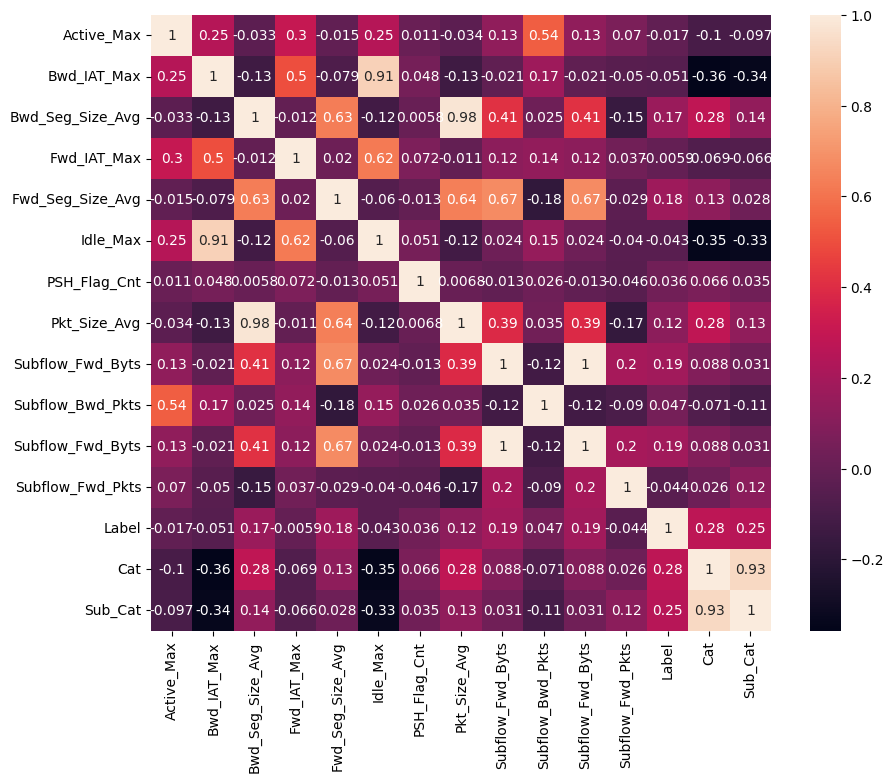

In [19]:
Cor = Column_n.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(Cor, annot=True)
plt.show()

###mesaure of frequence

In [20]:
df['Idle_Max'].value_counts()

74.0       26759
75.0       23216
73.0       19654
76.0       17399
119.0      12281
           ...  
9569.0         1
19470.0        1
18261.0        1
11370.0        1
6065.0         1
Name: Idle_Max, Length: 11956, dtype: int64

In [21]:
df['Idle_Max'].value_counts(normalize=True)*100

74.0       4.276083
75.0       3.709912
73.0       3.140705
76.0       2.780357
119.0      1.962501
             ...   
9569.0     0.000160
19470.0    0.000160
18261.0    0.000160
11370.0    0.000160
6065.0     0.000160
Name: Idle_Max, Length: 11956, dtype: float64

In [22]:
df['Idle_Max'].value_counts().cumsum()

74.0        26759
75.0        49975
73.0        69629
76.0        87028
119.0       99309
            ...  
9569.0     625779
19470.0    625780
18261.0    625781
11370.0    625782
6065.0     625783
Name: Idle_Max, Length: 11956, dtype: int64

###centrel tendency

In [23]:
df['Idle_Max'].mode()

0    74.0
Name: Idle_Max, dtype: float64

In [24]:
df['Idle_Max'].mean()

561.5405116470087

In [25]:
df['Idle_Max'].median()

114.0

###mesure of position

In [26]:
percentile = np.percentile(df['Idle_Max'], [10,40])
percentile

array([10., 80.])

In [27]:
quantile = np.quantile(df['Idle_Max'], [0,1])
quantile

array([    0., 99973.])

In [28]:
idle_mean_data = df['Idle_Max']

mean = np.mean(idle_mean_data)
std_dev = np.std(idle_mean_data)
z_scores = (idle_mean_data - mean) / std_dev
z_scores[:7]

0   -0.169734
1    1.288144
2   -0.171129
3   -0.143220
4   -0.169036
5   -0.166943
6   -0.192409
Name: Idle_Max, dtype: float64

###contangncy table

In [29]:
data = pd.crosstab(df['Sub_Cat'],df['Cat'])
data.head()

Cat,DoS,MITM ARP Spoofing,Mirai,Normal,Scan
Sub_Cat,,,,,
DoS-Synflooding,59391,0,0,0,0
MITM ARP Spoofing,0,35377,0,0,0
Mirai-Ackflooding,0,0,55124,0,0
Mirai-HTTP Flooding,0,0,55818,0,0
Mirai-Hostbruteforceg,0,0,121181,0,0


In [30]:
data['row_percent']= data.sum(axis=1)
print(data)

Cat                      DoS  MITM ARP Spoofing   Mirai  Normal   Scan  \
Sub_Cat                                                                  
DoS-Synflooding        59391                  0       0       0      0   
MITM ARP Spoofing          0              35377       0       0      0   
Mirai-Ackflooding          0                  0   55124       0      0   
Mirai-HTTP Flooding        0                  0   55818       0      0   
Mirai-Hostbruteforceg      0                  0  121181       0      0   
Mirai-UDP Flooding         0                  0  183554       0      0   
Normal                     0                  0       0   40073      0   
Scan Hostport              0                  0       0       0  22192   
Scan Port OS               0                  0       0       0  53073   

Cat                    row_percent  
Sub_Cat                             
DoS-Synflooding              59391  
MITM ARP Spoofing            35377  
Mirai-Ackflooding            55124  


In [31]:
data.loc['col_percent',:]= data.sum(axis=0)
print(data)

Cat                        DoS  MITM ARP Spoofing     Mirai   Normal     Scan  \
Sub_Cat                                                                         
DoS-Synflooding        59391.0                0.0       0.0      0.0      0.0   
MITM ARP Spoofing          0.0            35377.0       0.0      0.0      0.0   
Mirai-Ackflooding          0.0                0.0   55124.0      0.0      0.0   
Mirai-HTTP Flooding        0.0                0.0   55818.0      0.0      0.0   
Mirai-Hostbruteforceg      0.0                0.0  121181.0      0.0      0.0   
Mirai-UDP Flooding         0.0                0.0  183554.0      0.0      0.0   
Normal                     0.0                0.0       0.0  40073.0      0.0   
Scan Hostport              0.0                0.0       0.0      0.0  22192.0   
Scan Port OS               0.0                0.0       0.0      0.0  53073.0   
col_percent            59391.0            35377.0  415677.0  40073.0  75265.0   

Cat                    row_

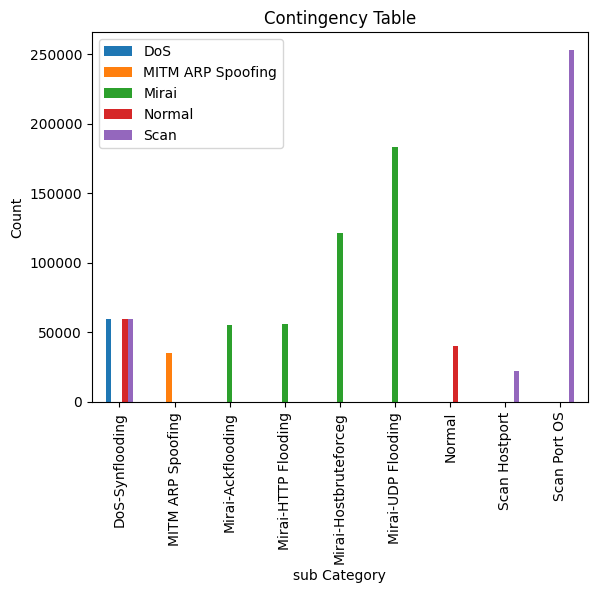

In [32]:
import matplotlib.pyplot as plt

# Create the contingency table
contingency_table = pd.DataFrame({
    'DoS': [59391.0, 0, 0, 0, 0, 0, 0, 0, 0],
    'MITM ARP Spoofing': [0, 35377.0, 0, 0, 0, 0, 0, 0, 0],
    'Mirai': [0, 0, 55124.0, 55818.0, 121181.0, 183554.0, 0, 0, 0],
    'Normal': [59391.0, 0, 0, 0, 0, 0, 40073.0 , 0, 0 ],
    'Scan': [59391.0, 0, 0, 0, 0, 0, 0, 22192.0, 253073.0],

}, index=['DoS-Synflooding', 'MITM ARP Spoofing', 'Mirai-Ackflooding', 'Mirai-HTTP Flooding', 'Mirai-Hostbruteforceg','Mirai-UDP Flooding'
 ,'Normal','Scan Hostport' ,'Scan Port OS' ])

# Plot the contingency table
contingency_table.plot(kind='bar')

# Set labels and title
plt.xlabel('sub Category')
plt.ylabel('Count')
plt.title('Contingency Table')

# Display the plot
plt.show()

In [33]:
setcol = ['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts','Label','Cat','Sub_Cat']


df3 = df[setcol]
df3.head()

,Active_Max,Bwd_IAT_Max,Bwd_Seg_Size_Avg,Fwd_IAT_Max,Fwd_Seg_Size_Avg,Idle_Max,PSH_Flag_Cnt,Pkt_Size_Avg,Subflow_Bwd_Byts,Subflow_Bwd_Pkts,Subflow_Fwd_Byts,Subflow_Fwd_Pkts,Label,Cat,Sub_Cat
0,0.0,0.0,1430.000000,0.0,982.0,75.0,0,1921.000000,1430,1,982,1,Anomaly,Mirai,Mirai-Ackflooding
1,0.0,5310.0,0.000000,0.0,0.0,4254.0,0,0.000000,0,2,0,1,Anomaly,DoS,DoS-Synflooding
2,0.0,71.0,935.333333,0.0,0.0,71.0,0,1398.000000,2806,3,0,0,Anomaly,Scan,Scan Port OS
3,0.0,151.0,1388.000000,0.0,0.0,151.0,0,2082.000000,2776,2,0,0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,0.0,0.0,420.000000,76.0,443.0,77.0,0,575.333333,420,1,886,2,Anomaly,Mirai,Mirai-Hostbruteforceg


In [34]:
df['Sub_Cat'].value_counts(normalize=True)*100

Mirai-UDP Flooding       29.331893
Mirai-Hostbruteforceg    19.364700
DoS-Synflooding           9.490670
Mirai-HTTP Flooding       8.919705
Mirai-Ackflooding         8.808804
Scan Port OS              8.481055
Normal                    6.403657
MITM ARP Spoofing         5.653238
Scan Hostport             3.546277
Name: Sub_Cat, dtype: float64

In [35]:
# Initialize empty lists to store the results
column_names = []
unique_counts = []
unique_values_list = []

# Loop through each column in the original DataFrame
for col in df3.columns:
    unique_values = df3[col].unique()
    count_unique = df3[col].nunique()
    column_names.append(col)
    unique_counts.append(count_unique)
    unique_values_list.append(str(unique_values))  # Convert to string for easier storage and visualization

# Create a new DataFrame to store the above information
unique_info_df = pd.DataFrame({
    'Column_Name': column_names,
    'Unique_Count': unique_counts,
    'Unique_Values': unique_values_list
})

# Show the resulting DataFrame
unique_info_df


,Column_Name,Unique_Count,Unique_Values
0,Active_Max,1346,[0.000e+00 1.000e+00 8.980e+02 ... 1.239e+03 2...
1,Bwd_IAT_Max,12223,[ 0. 5310. 71. ... 46141. 30802. 6065.]
2,Bwd_Seg_Size_Avg,2583,[1430. 0. 935.33333333 ......
3,Fwd_IAT_Max,1793,[ 0. 76. 74. ... 25069. 652. 42089.]
4,Fwd_Seg_Size_Avg,2141,[ 982. 0. 443. ......
5,Idle_Max,11956,[ 75. 4254. 71. ... 42137. 30802. 6065.]
6,PSH_Flag_Cnt,2,[0 1]
7,Pkt_Size_Avg,5327,[1921. 0. 1398. ......
8,Subflow_Bwd_Byts,2612,[1430 0 2806 ... 2214 7040 4601]
9,Subflow_Bwd_Pkts,42,[ 1 2 3 7 5 4 9 8 6 10 144 ...


###**Step 4: Filter Data for "Risk of cancellation level" Cases**

In [36]:
Mirai_UDP_Flooding = df3[df3['Sub_Cat'] == 'Mirai-UDP Flooding']
Mirai_Hostbruteforceg = df3[df3['Sub_Cat'] == 'Mirai-Hostbruteforceg']
DoS_Synflooding = df3[df3['Sub_Cat'] == 'DoS-Synflooding']
Mirai_HTTP_Flooding = df3[df3['Sub_Cat'] == 'Mirai-HTTP Flooding']
Scan_Port_OS = df3[df3['Sub_Cat'] == 'Scan Port OS']
Normal = df3[df3['Sub_Cat'] == 'Normal']
MITM_ARP_Spoofing = df3[df3['Sub_Cat'] == 'MITM ARP Spoofing']
Scan_Hostport = df3[df3['Sub_Cat'] == 'Scan Hostport']


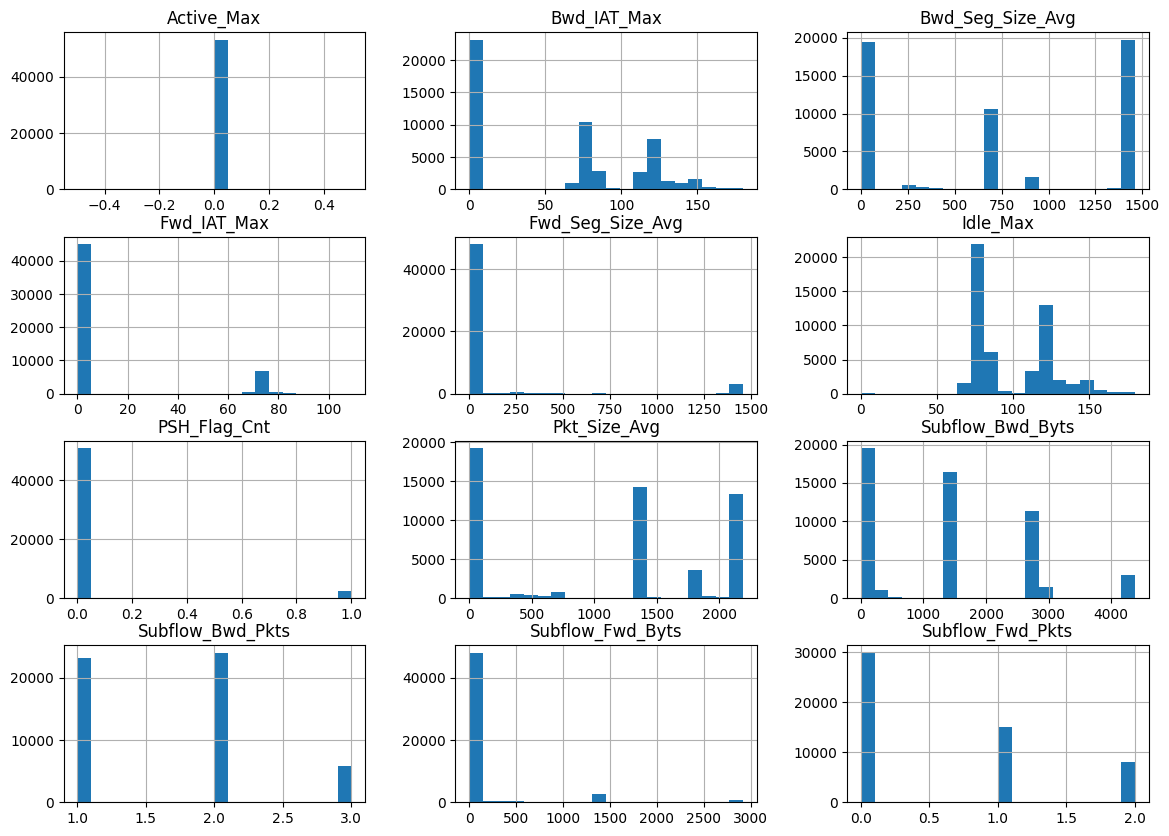

In [37]:
Scan_Port_OS[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show()


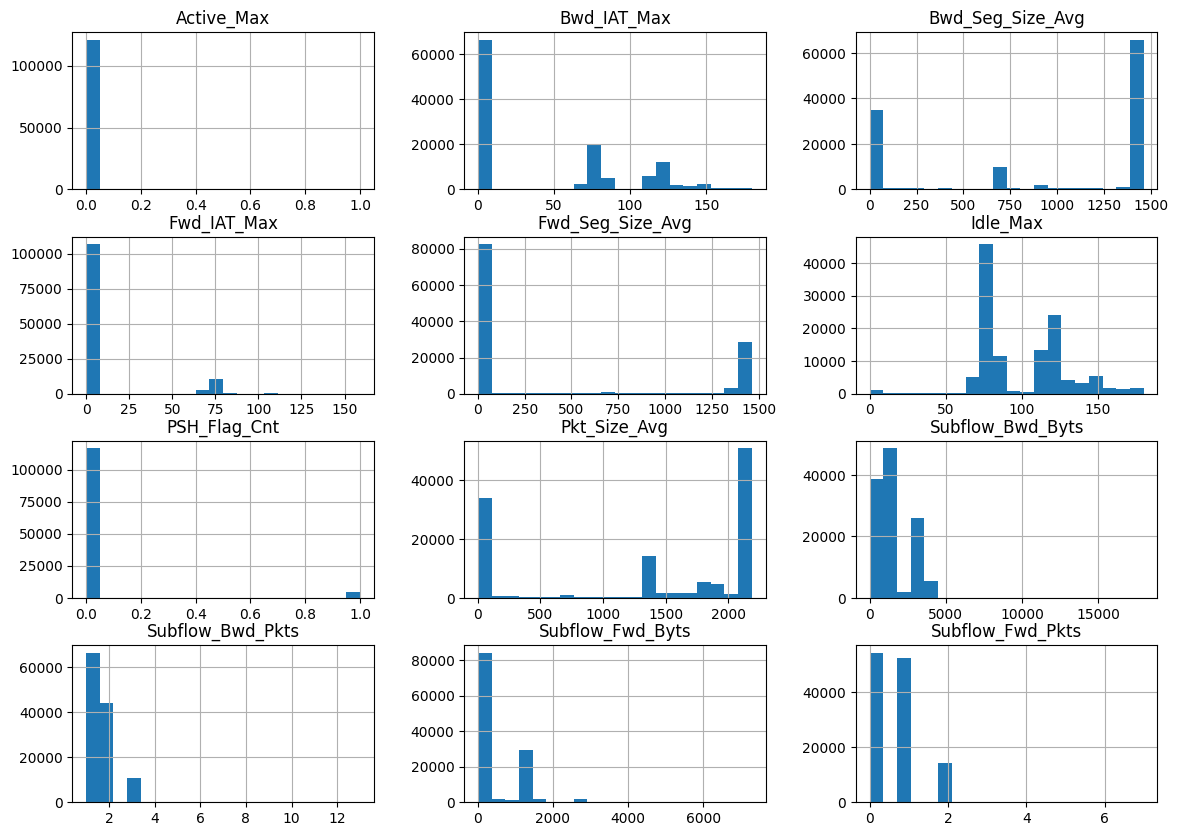

In [38]:
Mirai_Hostbruteforceg[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show()

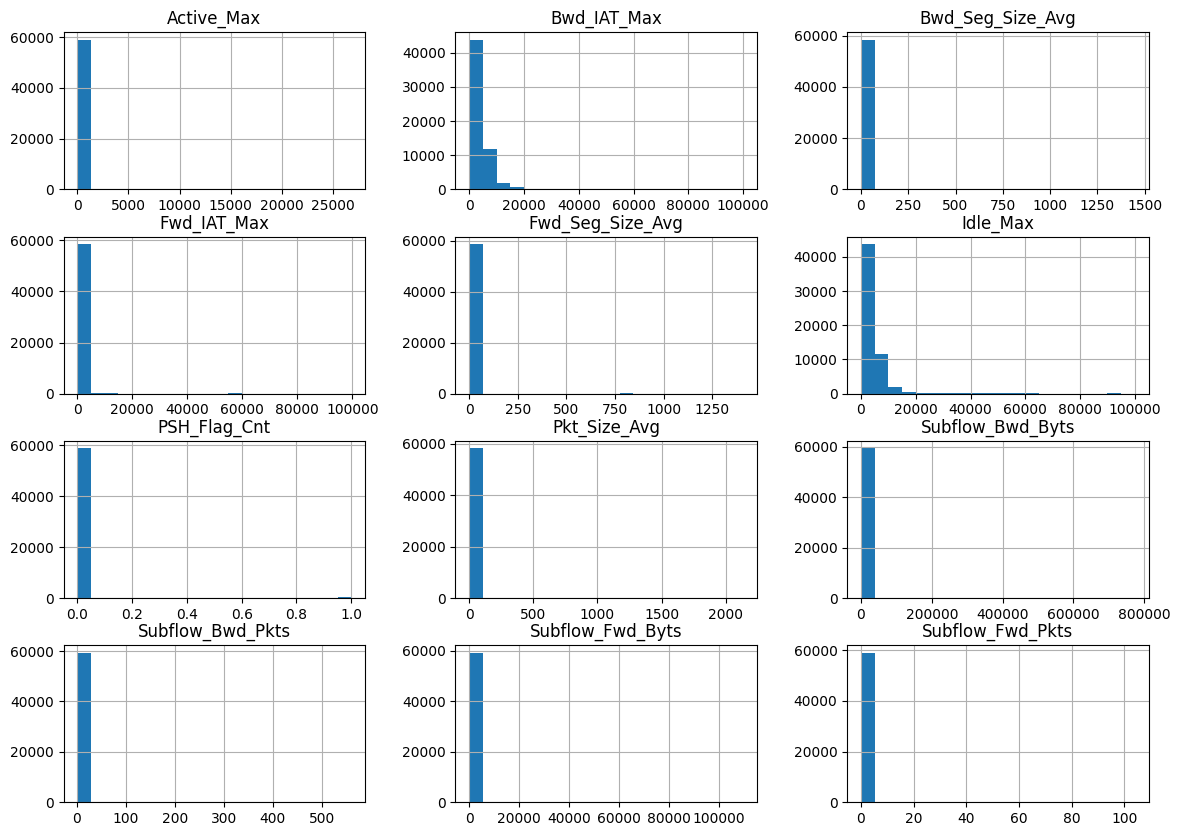

In [39]:
DoS_Synflooding[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show()

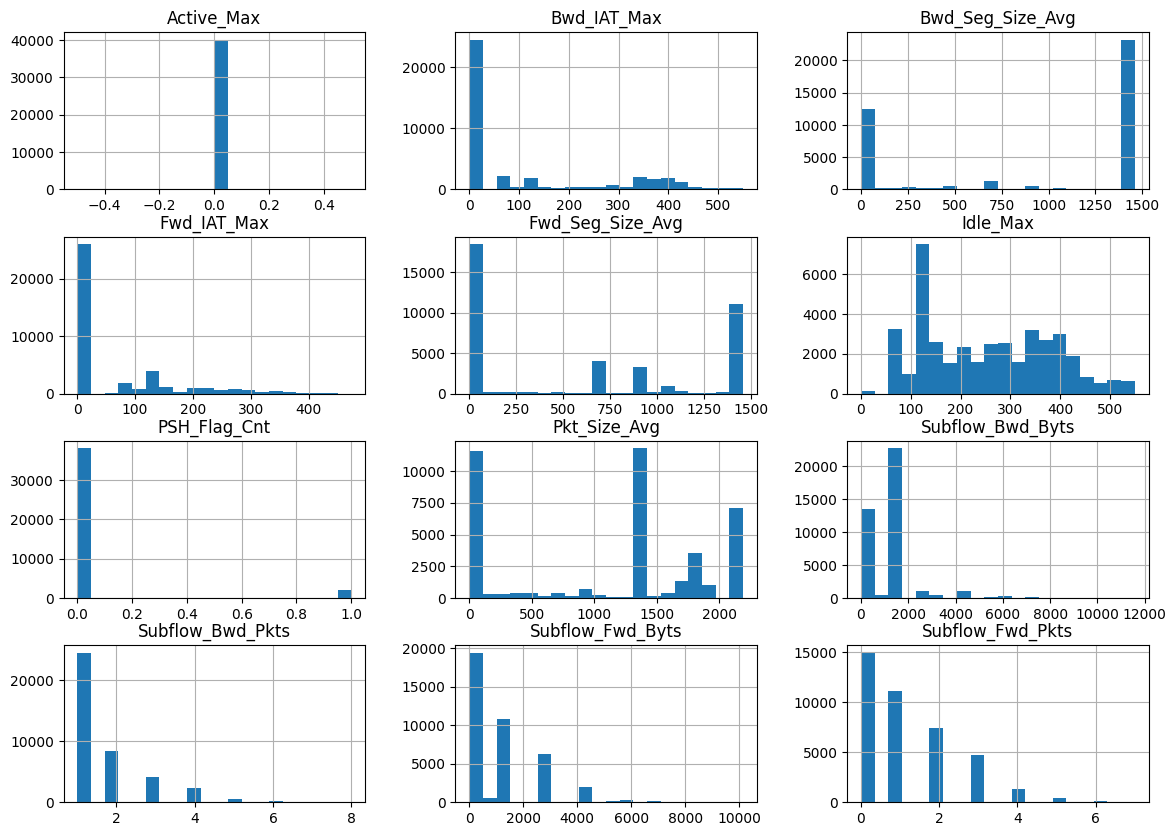

In [40]:
Normal[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show()

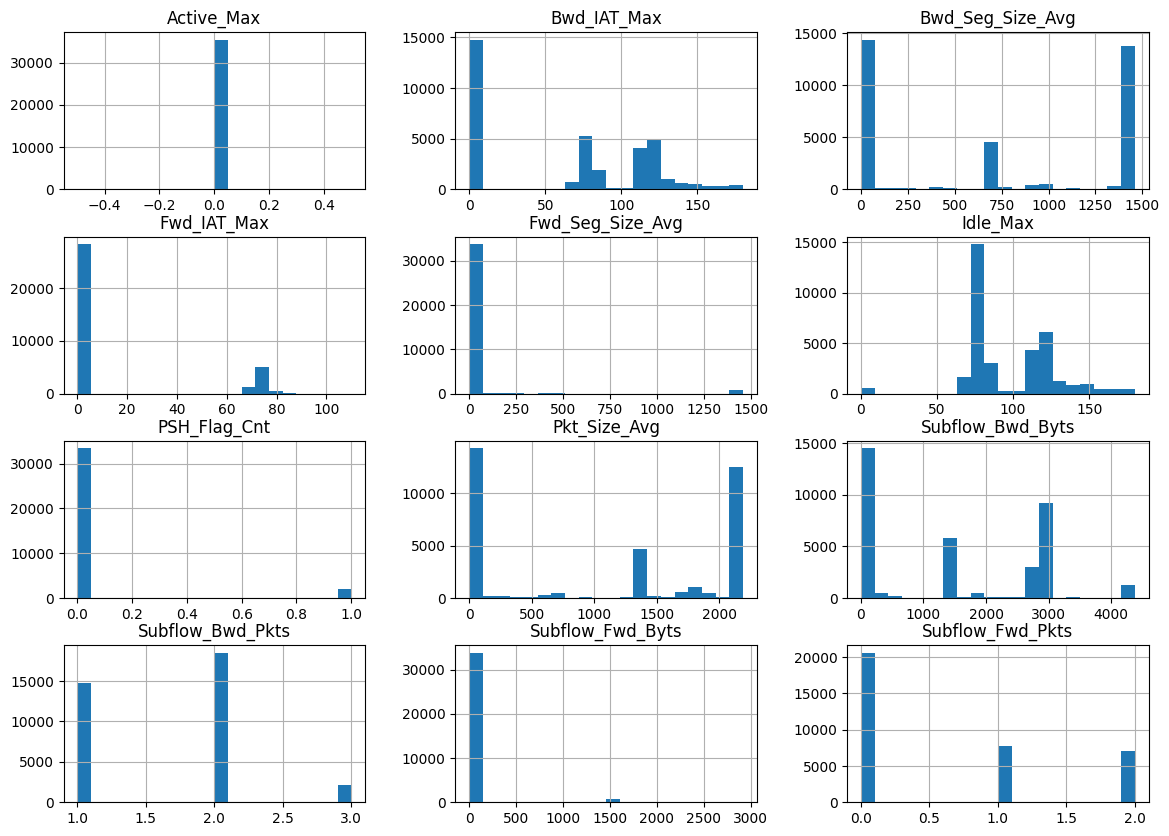

In [41]:
MITM_ARP_Spoofing[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show()

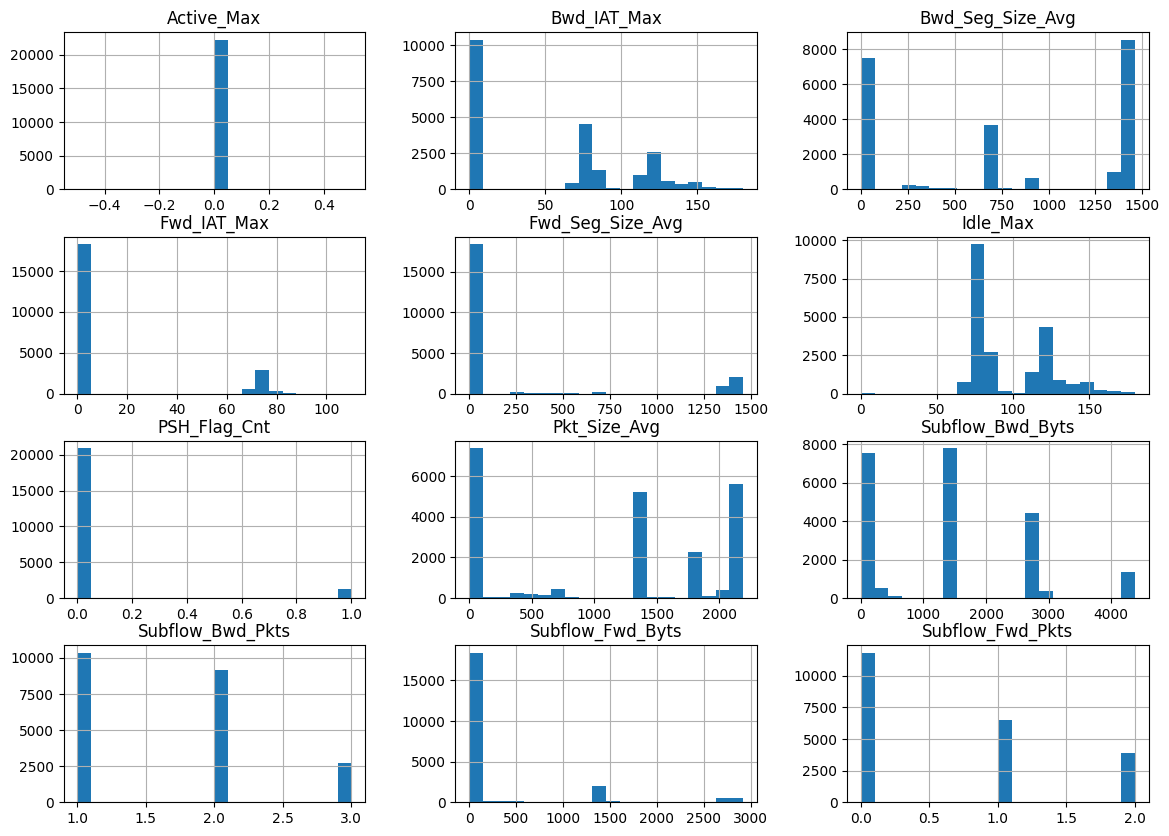

In [42]:
Scan_Hostport[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show()

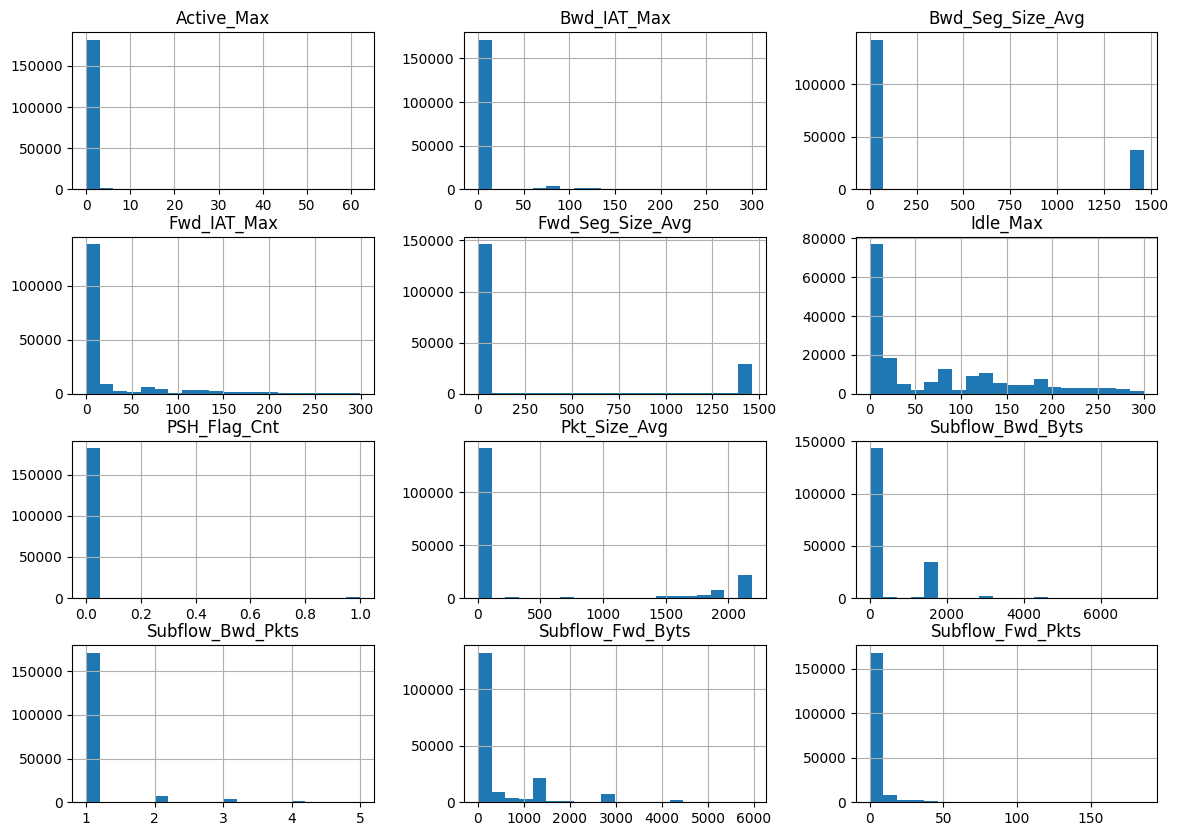

In [43]:
Mirai_UDP_Flooding[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show()

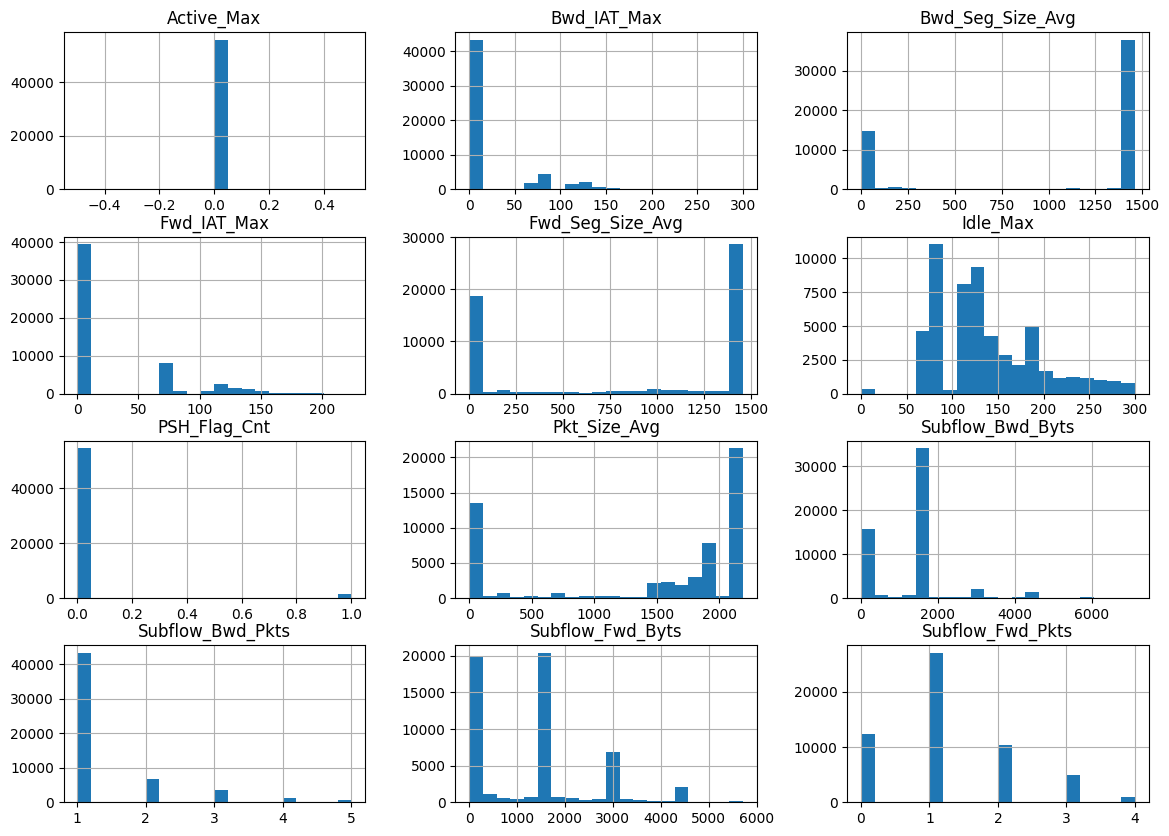

In [44]:
Mirai_HTTP_Flooding[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show()

<ipython-input-45-10edc0af00c0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


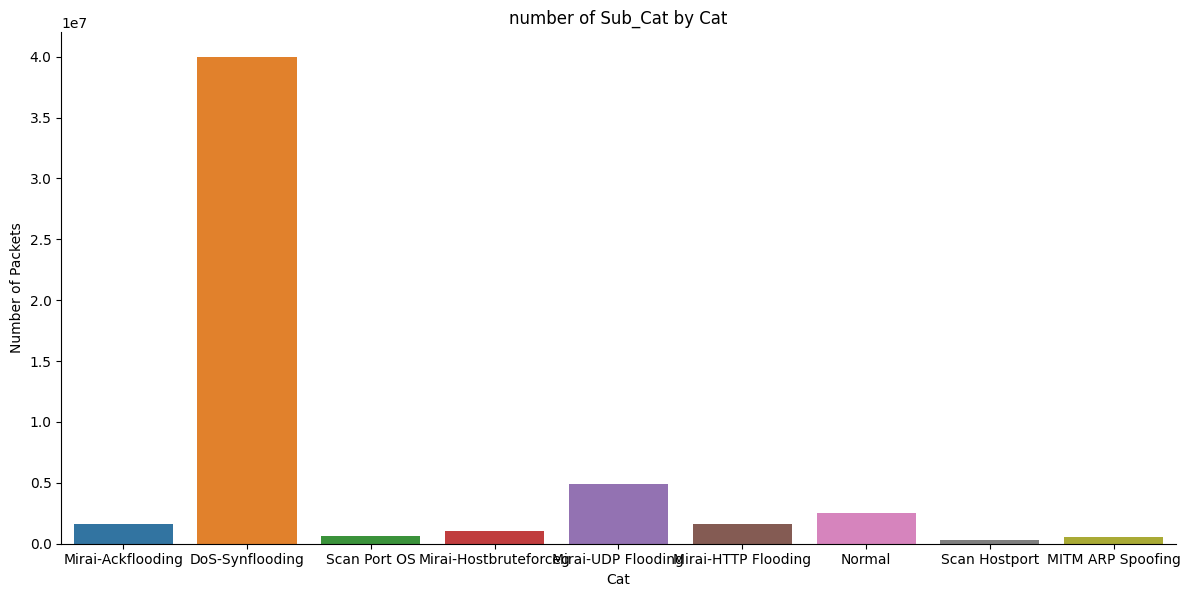

In [45]:
sns.catplot(
    x="Sub_Cat",
    y="Fwd_IAT_Max",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

Scan_Port_OS[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']].hist(figsize=(14, 10), bins=20)
plt.show() # no all features max attack with value scan port os

<ipython-input-46-7db5d9b9089d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


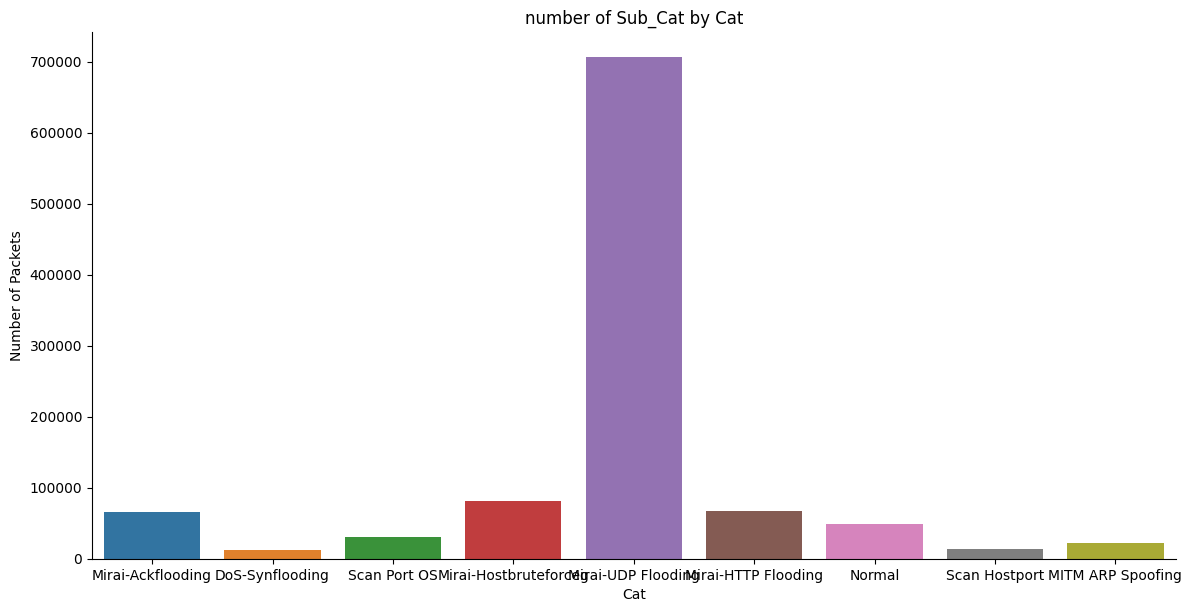

In [46]:
sns.catplot(
    x="Sub_Cat",
    y="Subflow_Fwd_Pkts",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

Scan_Port_OS[['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts'

<ipython-input-47-b9bcd1189bf5>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


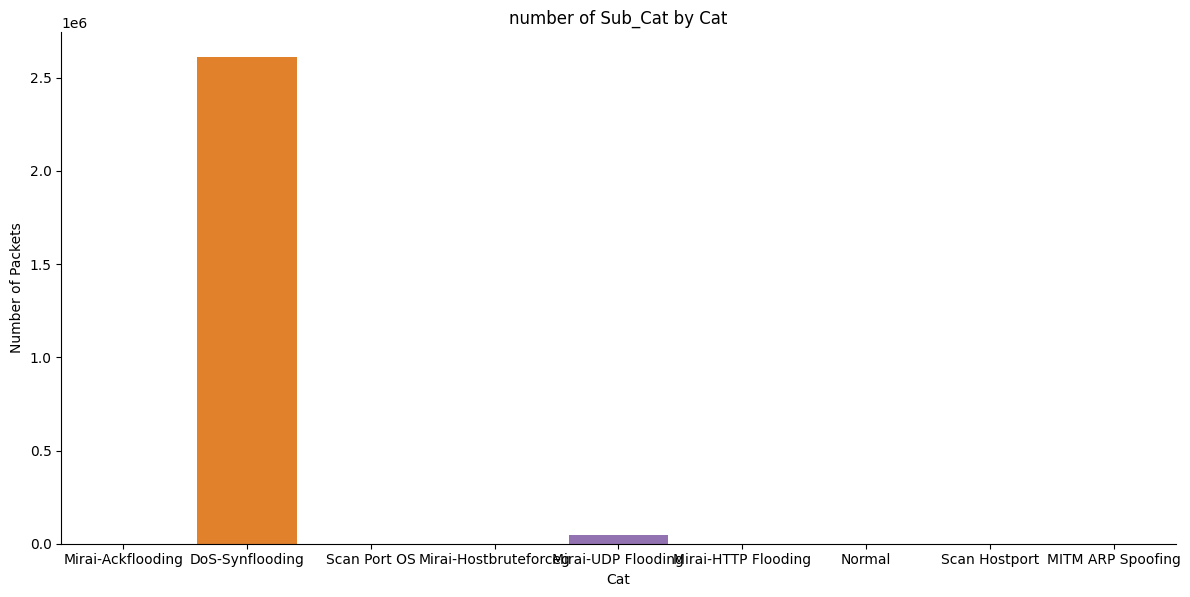

In [47]:
sns.catplot(
    x="Sub_Cat",
    y="Active_Max",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

<ipython-input-48-1455e7277087>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


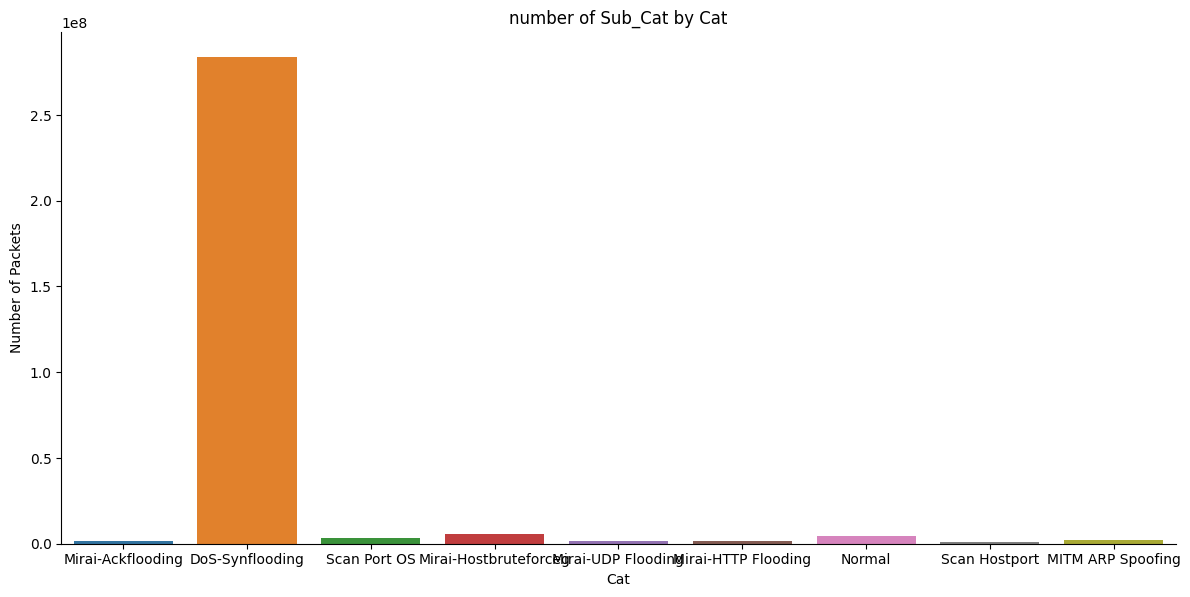

In [48]:
sns.catplot(
    x="Sub_Cat",
    y="Bwd_IAT_Max",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

<ipython-input-49-f363553808ce>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


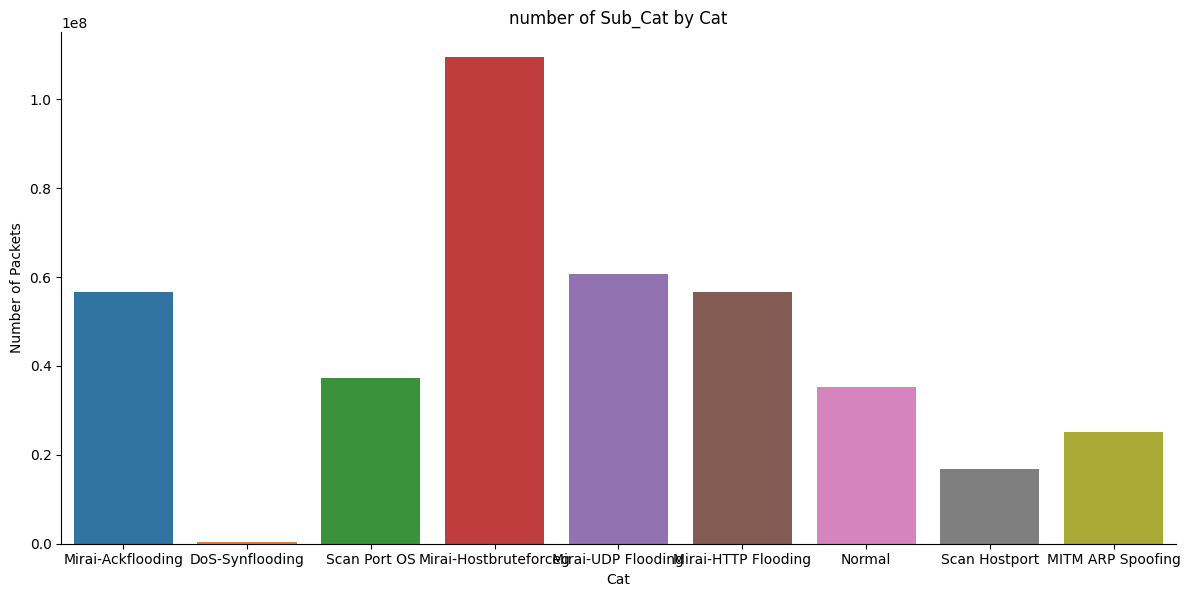

In [49]:
sns.catplot(
    x="Sub_Cat",
    y="Bwd_Seg_Size_Avg",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

<ipython-input-50-23b17ea6ad43>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


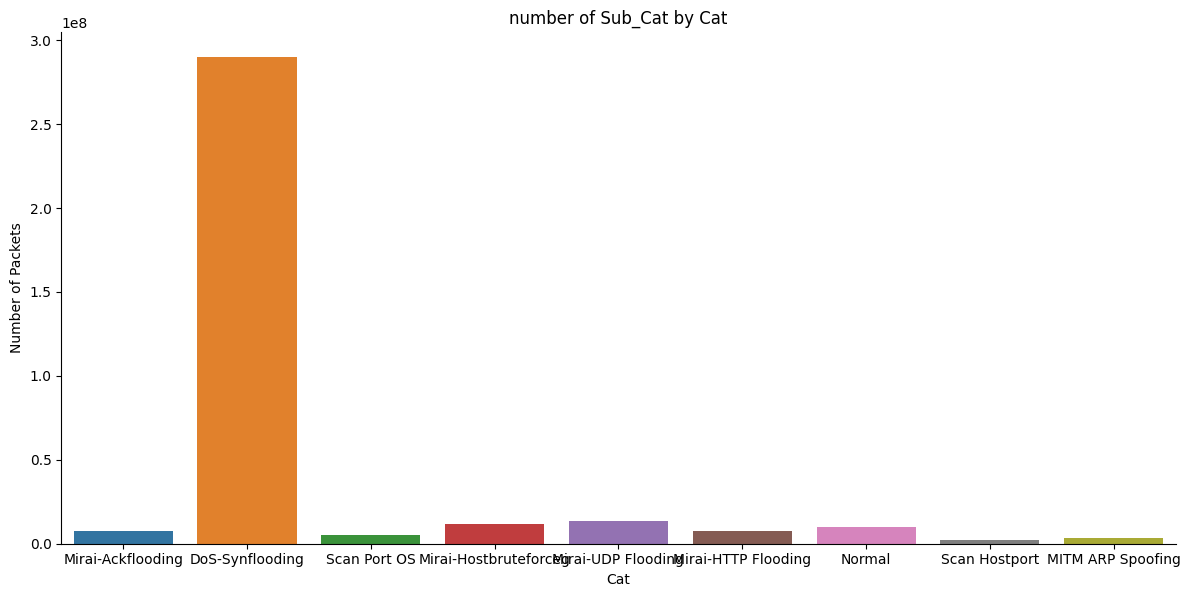

In [50]:
sns.catplot(
    x="Sub_Cat",
    y="Idle_Max",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

<ipython-input-53-e939e424ec48>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


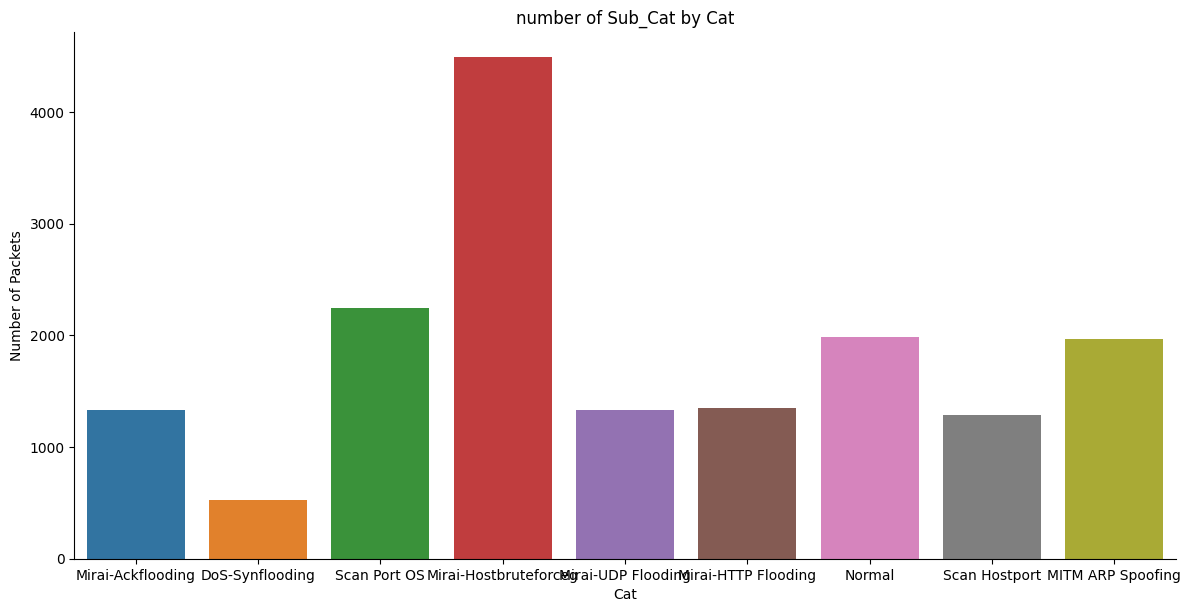

In [53]:
sns.catplot(
    x="Sub_Cat",
    y="PSH_Flag_Cnt",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

<ipython-input-54-4752a3023fb1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


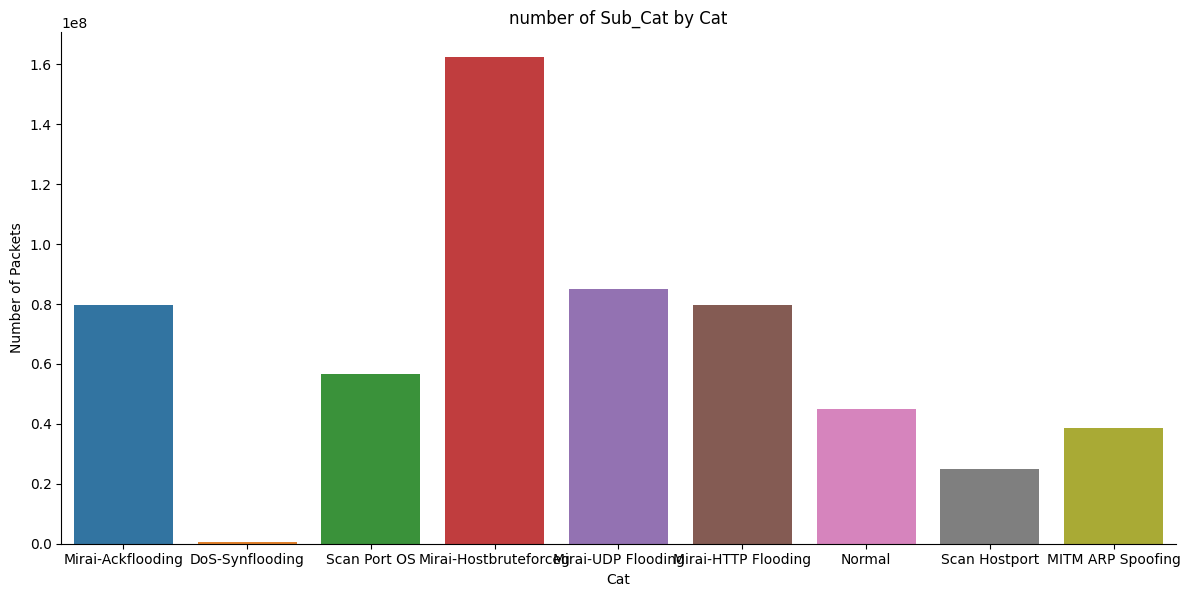

In [54]:
sns.catplot(
    x="Sub_Cat",
    y="Pkt_Size_Avg",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

<ipython-input-55-c127ff3fb893>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


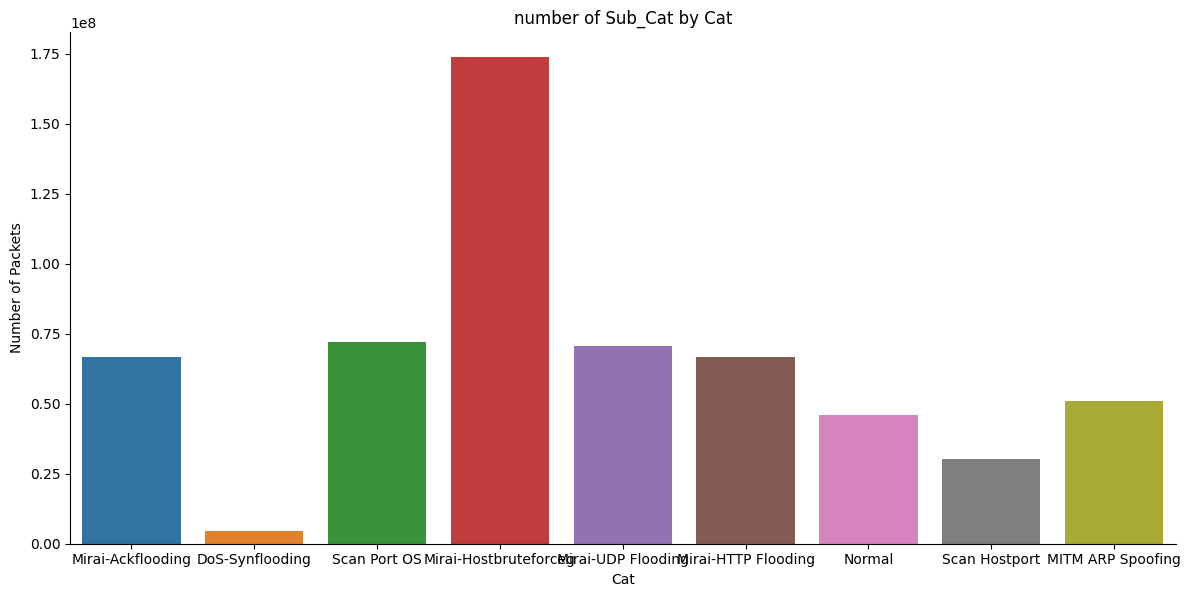

In [55]:
sns.catplot(
    x="Sub_Cat",
    y="Subflow_Bwd_Byts",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

<ipython-input-56-7db5d9b9089d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


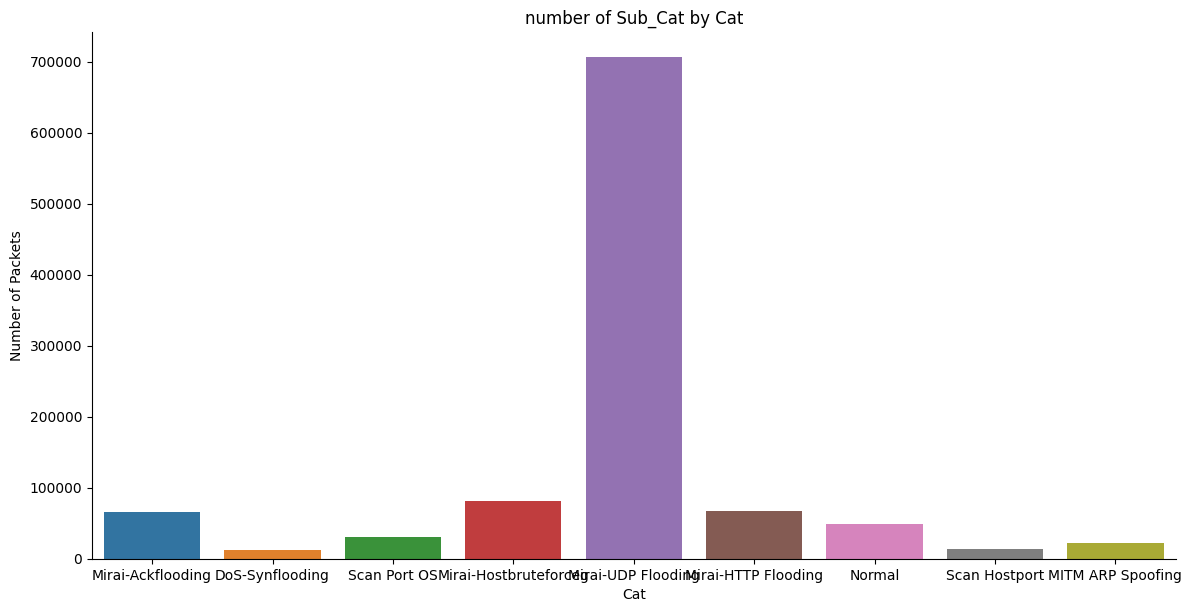

In [56]:
sns.catplot(
    x="Sub_Cat",
    y="Subflow_Fwd_Pkts",
    kind="bar",  # Use "bar" for categorical data
    data=df3,
    estimator=sum,  # You can change the estimator as needed
    ci=None,  # Remove confidence intervals if not needed
    height=6,  # Adjust the height of the plot
    aspect=2,  # Adjust the aspect ratio for a wider plot
)

# Set the title and labels for the chart
plt.title("number of Sub_Cat by Cat")
plt.xlabel("Cat")
plt.ylabel("Number of Packets")

# Show the chart
plt.show()

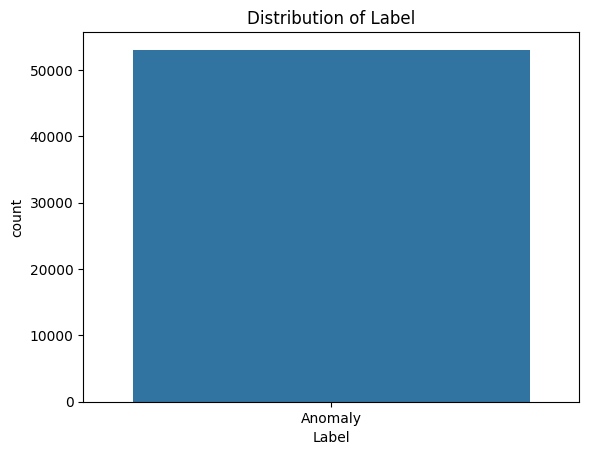

In [57]:
categorical_cols = ['Label']

for col in categorical_cols:
    sns.countplot(x=col, data=Scan_Port_OS)
    plt.title('Distribution of ' +col)
    plt.show()


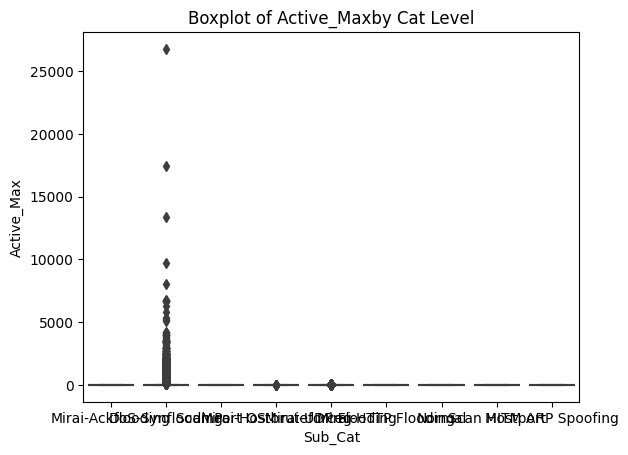

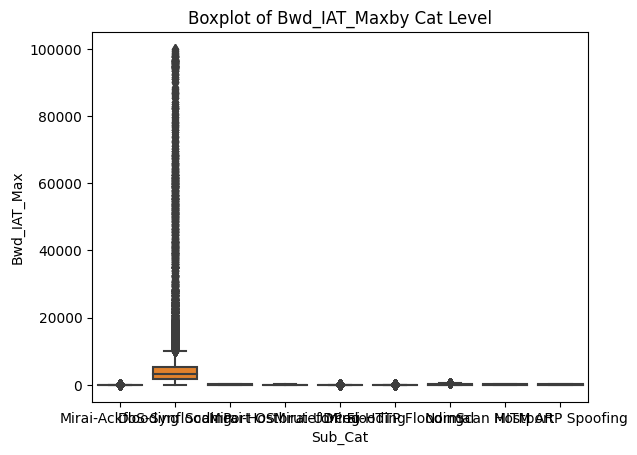

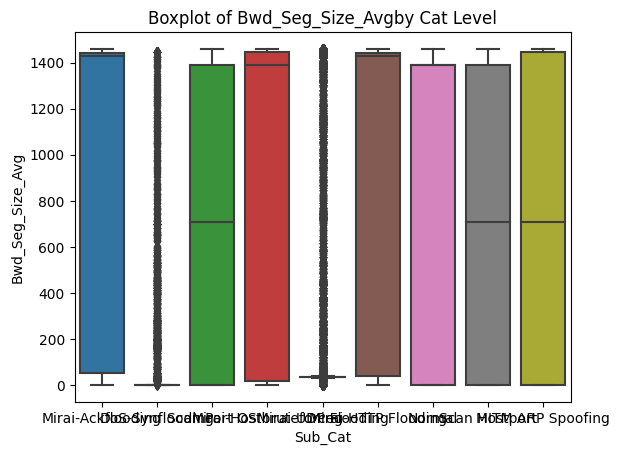

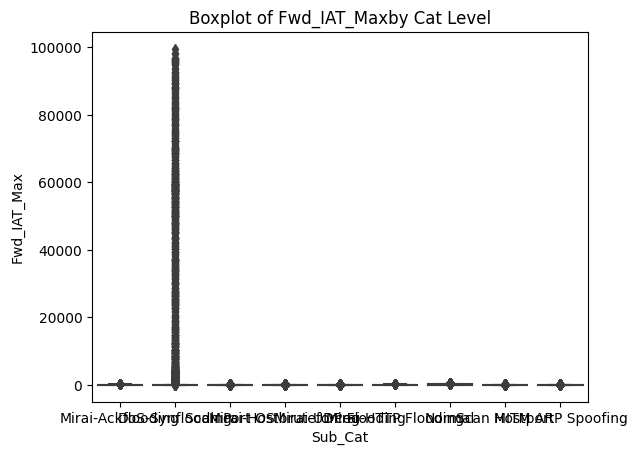

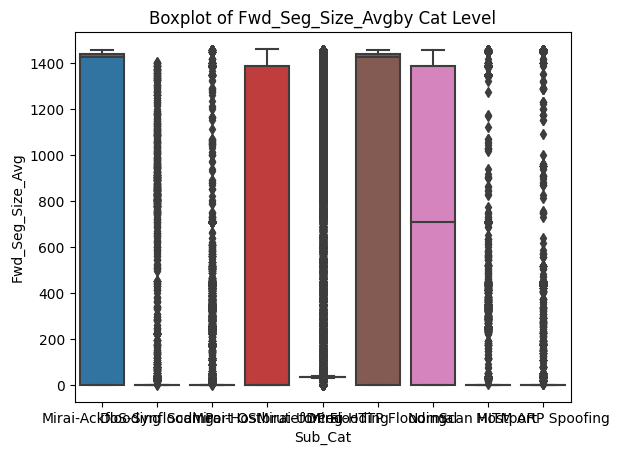

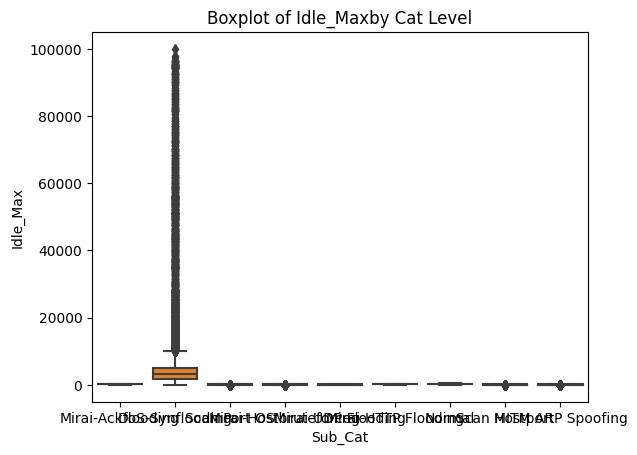

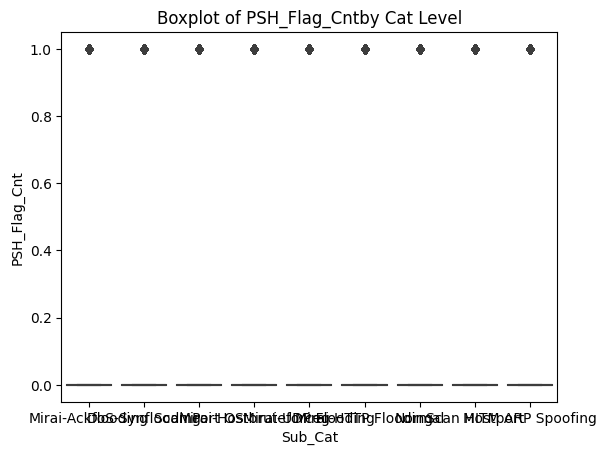

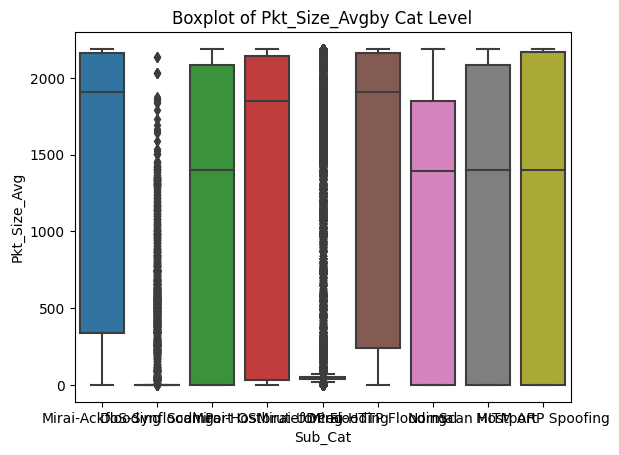

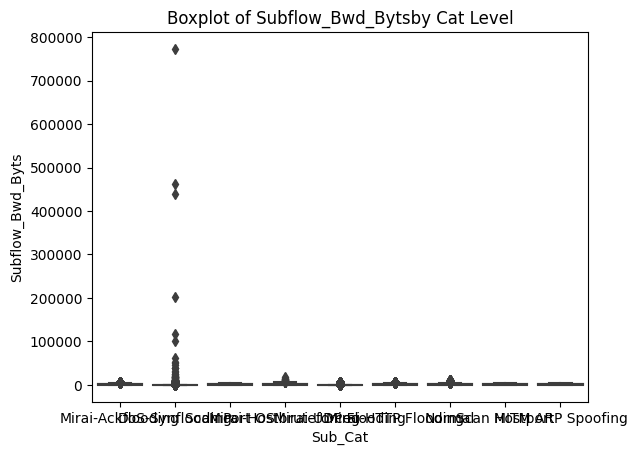

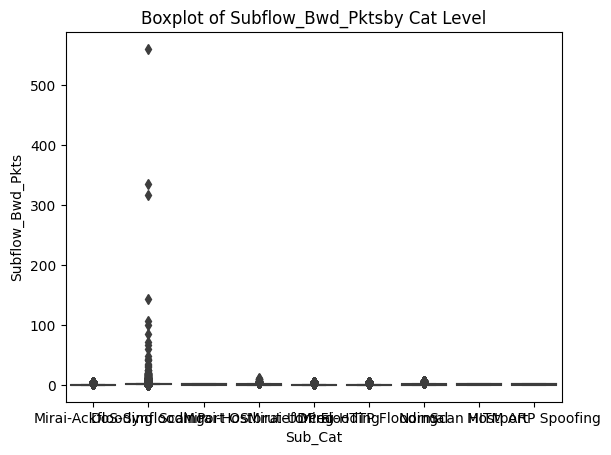

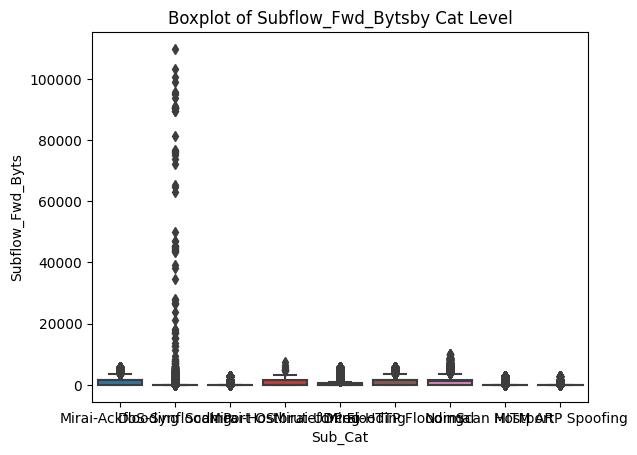

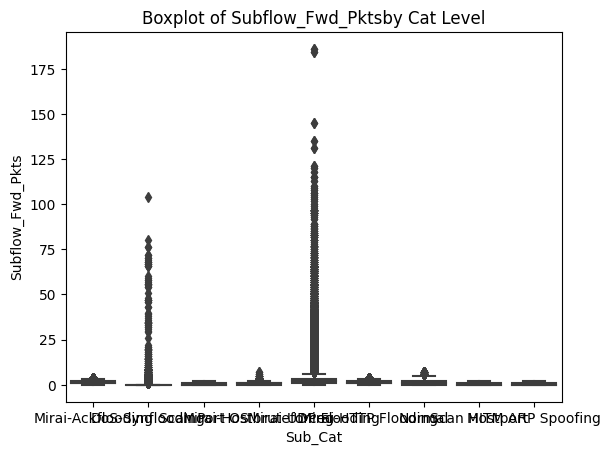

In [58]:
numaric = ['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']

for col in numaric:
    sns.boxplot(x='Sub_Cat', y=col, data=df3)
    plt.title('Boxplot of '+col+ 'by Cat Level')
    plt.show()
#how to make speace between values

Mirai_UDP_Flooding = df3[df3['Sub_Cat'] == 'Mirai-UDP Flooding ']
Mirai_Hostbruteforceg = df3[df3['Sub_Cat'] == 'Mirai-Hostbruteforceg']
DoS_Synflooding = df3[df3['Sub_Cat'] == 'DoS-Synflooding']
Mirai_HTTP_Flooding = df3[df3['Sub_Cat'] == 'Mirai-HTTP Flooding']
Scan_Port_OS = df3[df3['Sub_Cat'] == 'Scan Port OS']
Normal = df3[df3['Sub_Cat'] == 'Normal']
MITM_ARP_Spoofing = df3[df3['Sub_Cat'] == 'MITM ARP Spoofing']
Scan_Hostport = df3[df3['Sub_Cat'] == 'Scan Hostport']

In [59]:
Mirai_UDP_Flooding = df3[df3['Sub_Cat'] == 'Mirai-UDP Flooding']
Mirai_Hostbruteforceg = df3[df3['Sub_Cat'] == 'Mirai-Hostbruteforceg']
DoS_Synflooding = df3[df3['Sub_Cat'] == 'DoS-Synflooding']
Mirai_HTTP_Flooding = df3[df3['Sub_Cat'] == 'Mirai-HTTP Flooding']
Scan_Port_OS = df3[df3['Sub_Cat'] == 'Scan Port OS']
Normal = df3[df3['Sub_Cat'] == 'Normal']
MITM_ARP_Spoofing = df3[df3['Sub_Cat'] == 'MITM ARP Spoofing']
Scan_Hostport = df3[df3['Sub_Cat'] == 'Scan Hostport']

In [60]:
# Define the columns you want to compute statistics for
numarics = ['Active_Max',
'Bwd_IAT_Max',
'Bwd_Seg_Size_Avg',
'Fwd_IAT_Max',
'Fwd_Seg_Size_Avg',
'Idle_Max',
'PSH_Flag_Cnt',
'Pkt_Size_Avg',
'Subflow_Bwd_Byts',
'Subflow_Bwd_Pkts',
'Subflow_Fwd_Byts',
'Subflow_Fwd_Pkts']

# Define a list with all your dataframes and corresponding risk levels
dataframes = [

    ('Mirai UDP Flooding', Mirai_UDP_Flooding),
    ('Mirai Hostbruteforceg', Mirai_Hostbruteforceg),
    ('DoS Synflooding', DoS_Synflooding),
    ('Mirai HTTP Flooding', Mirai_HTTP_Flooding),
    ('Scan Port OS',Scan_Port_OS),
    ('Normal', Normal),
    ('MITM ARP Spoofing', MITM_ARP_Spoofing),
    ('Scan Hostport', Scan_Hostport)
]


# Initialize a dictionary to store the resulting DataFrames for each risk level
statistics_dfs = {}

# Loop through all the dataframes and risk levels
for Sub_Cat, df in dataframes:
    results = {}
    for col in numarics:
        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        data_range = max_val - min_val
        mode = df[col].mode()[0]  # Taking the first mode value if there are multiple

        # Store the statistics in a dictionary
        results[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Range': data_range
        }

    # Convert the results dictionary to a DataFrame and store in the dictionary
    statistics_dfs[Sub_Cat] = pd.DataFrame(results).transpose()

# Now, statistics_dfs will contain each statistics DataFrame, keyed by the risk level
# For example, to view the statistics DataFrame for 'High Risk', you can do:

print("Statistics for Mirai_UDP_Flooding")
statistics_dfs['Mirai UDP Flooding']

Statistics for Mirai_UDP_Flooding


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.250460,0.000000,0.0,1.309483,0.0,62.0,0.0,0.0,0.0,62.0
Bwd_IAT_Max,7.722142,0.000000,0.0,31.430336,0.0,300.0,0.0,0.0,0.0,300.0
Bwd_Seg_Size_Avg,330.842434,32.000000,32.0,571.475920,0.0,1460.0,32.0,35.0,3.0,1460.0
Fwd_IAT_Max,26.920034,2.000000,0.0,55.893302,0.0,299.0,0.0,14.0,14.0,299.0
Fwd_Seg_Size_Avg,283.372422,32.000000,32.0,527.206533,0.0,1460.0,32.0,35.0,3.0,1460.0
Idle_Max,72.963804,25.000000,3.0,80.554498,0.0,300.0,8.0,125.0,117.0,300.0
PSH_Flag_Cnt,0.007279,0.000000,0.0,0.085003,0.0,1.0,0.0,0.0,0.0,1.0
Pkt_Size_Avg,462.942777,46.666667,48.0,799.430084,0.0,2190.0,38.4,52.5,14.1,2190.0
Subflow_Bwd_Byts,385.136314,32.000000,32.0,747.514121,0.0,7120.0,32.0,60.0,28.0,7120.0
Subflow_Bwd_Pkts,1.111782,1.000000,1.0,0.470032,1.0,5.0,1.0,1.0,0.0,4.0


In [61]:
print("Mirai Hostbruteforceg")
statistics_dfs['Mirai Hostbruteforceg']

Mirai Hostbruteforceg


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.000099,0.000000,0.0,0.009951,0.0,1.0,0.0,0.0,0.0,1.0
Bwd_IAT_Max,45.521031,0.000000,0.0,53.524891,0.0,180.0,0.0,83.0,83.0,180.0
Bwd_Seg_Size_Avg,904.227857,1388.000000,1448.0,631.722214,0.0,1460.0,15.5,1448.0,1432.5,1460.0
Fwd_IAT_Max,8.802354,0.000000,0.0,24.050392,0.0,159.0,0.0,0.0,0.0,159.0
Fwd_Seg_Size_Avg,412.581036,0.000000,0.0,632.281066,0.0,1464.0,0.0,1388.0,1388.0,1464.0
Idle_Max,98.854829,85.000000,74.0,29.777487,0.0,180.0,75.0,120.0,45.0,180.0
PSH_Flag_Cnt,0.037060,0.000000,0.0,0.188910,0.0,1.0,0.0,0.0,0.0,1.0
Pkt_Size_Avg,1341.299028,1850.666667,0.0,912.104737,0.0,2190.0,30.0,2145.0,2115.0,2190.0
Subflow_Bwd_Byts,1435.363720,1430.000000,0.0,1202.171307,0.0,17990.0,20.0,2776.0,2756.0,17990.0
Subflow_Bwd_Pkts,1.542915,1.000000,1.0,0.662584,1.0,13.0,1.0,2.0,1.0,12.0


In [62]:
print("DoS-Synflooding")
statistics_dfs['DoS Synflooding']

DoS-Synflooding


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,43.993214,0.0,0.0,285.636136,0.0,26785.0000,0.0,0.0,0.0,26785.0000
Bwd_IAT_Max,4782.104225,3194.0,0.0,7705.098989,0.0,99973.0000,1806.0,5142.5,3336.5,99973.0000
Bwd_Seg_Size_Avg,8.267437,0.0,0.0,78.599109,0.0,1448.0000,0.0,0.0,0.0,1448.0000
Fwd_IAT_Max,673.487717,0.0,0.0,6250.546537,0.0,99600.0000,0.0,0.0,0.0,99600.0000
Fwd_Seg_Size_Avg,8.788699,0.0,0.0,90.326703,0.0,1407.1875,0.0,0.0,0.0,1407.1875
Idle_Max,4885.701537,3187.0,0.0,8115.410632,0.0,99973.0000,1809.0,5139.5,3330.5,99973.0000
PSH_Flag_Cnt,0.008789,0.0,0.0,0.093339,0.0,1.0000,0.0,0.0,0.0,1.0000
Pkt_Size_Avg,11.940709,0.0,0.0,97.756624,0.0,2136.0000,0.0,0.0,0.0,2136.0000
Subflow_Bwd_Byts,77.906383,0.0,0.0,4298.967464,0.0,773284.0000,0.0,0.0,0.0,773284.0000
Subflow_Bwd_Pkts,2.101362,2.0,2.0,3.230542,1.0,560.0000,2.0,2.0,0.0,559.0000


In [63]:
print("Mirai HTTP Flooding")
statistics_dfs['Mirai HTTP Flooding']

Mirai HTTP Flooding


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Bwd_IAT_Max,25.393780,0.000000,0.0,52.913310,0.0,300.0,0.0,0.0,0.0,300.0
Bwd_Seg_Size_Avg,1014.812875,1430.000000,1430.0,633.812240,0.0,1460.0,38.0,1441.0,1403.0,1460.0
Fwd_IAT_Max,29.178401,0.000000,0.0,48.269387,0.0,224.0,0.0,73.0,73.0,224.0
Fwd_Seg_Size_Avg,859.172211,1430.000000,1441.0,661.493538,0.0,1460.0,0.0,1441.0,1441.0,1460.0
Idle_Max,135.691677,122.000000,75.0,56.153107,0.0,300.0,84.0,173.0,89.0,300.0
PSH_Flag_Cnt,0.024257,0.000000,0.0,0.153849,0.0,1.0,0.0,0.0,0.0,1.0
Pkt_Size_Avg,1426.257086,1906.666667,2161.5,876.385919,0.0,2190.0,240.5,2161.5,1921.0,2190.0
Subflow_Bwd_Byts,1193.354903,1430.000000,1430.0,948.079740,0.0,7120.0,136.0,1441.0,1305.0,7120.0
Subflow_Bwd_Pkts,1.367588,1.000000,1.0,0.795294,1.0,5.0,1.0,1.0,0.0,4.0


In [64]:
print("Scan Port OS")
statistics_dfs['Scan Port OS']


Scan Port OS


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Bwd_IAT_Max,57.522488,73.0,0.0,54.393341,0.0,180.0,0.0,116.0,116.0,180.0
Bwd_Seg_Size_Avg,704.326600,709.0,0.0,604.228784,0.0,1460.0,0.0,1388.0,1388.0,1460.0
Fwd_IAT_Max,11.190926,0.0,0.0,26.527102,0.0,109.0,0.0,0.0,0.0,109.0
Fwd_Seg_Size_Avg,100.805833,0.0,0.0,340.240941,0.0,1460.0,0.0,0.0,0.0,1460.0
Idle_Max,97.905394,84.0,74.0,26.325240,0.0,180.0,75.0,120.0,45.0,180.0
PSH_Flag_Cnt,0.042319,0.0,0.0,0.201318,0.0,1.0,0.0,0.0,0.0,1.0
Pkt_Size_Avg,1067.384172,1403.0,0.0,874.844108,0.0,2190.0,0.0,2082.0,2082.0,2190.0
Subflow_Bwd_Byts,1355.790967,1418.0,0.0,1281.282585,0.0,4380.0,0.0,2776.0,2776.0,4380.0
Subflow_Bwd_Pkts,1.674712,2.0,2.0,0.664355,1.0,3.0,1.0,2.0,1.0,2.0


In [65]:
print("Normal")
statistics_dfs['Normal']

Normal


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Bwd_IAT_Max,108.822948,0.0,0.0,161.629927,0.0,550.0,0.0,217.000000,217.000000,550.0
Bwd_Seg_Size_Avg,880.897885,1388.0,1388.0,640.289977,0.0,1460.0,0.0,1388.000000,1388.000000,1460.0
Fwd_IAT_Max,63.441345,0.0,0.0,100.042157,0.0,474.0,0.0,127.000000,127.000000,474.0
Fwd_Seg_Size_Avg,597.693168,709.0,0.0,603.975205,0.0,1460.0,0.0,1388.000000,1388.000000,1460.0
Idle_Max,251.734260,248.0,119.0,127.852629,0.0,550.0,131.0,360.000000,229.000000,550.0
PSH_Flag_Cnt,0.049510,0.0,0.0,0.216932,0.0,1.0,0.0,0.000000,0.000000,1.0
Pkt_Size_Avg,1121.573021,1395.5,0.0,808.562160,0.0,2190.0,0.0,1850.666667,1850.666667,2190.0
Subflow_Bwd_Byts,1147.053652,1388.0,1388.0,1145.008591,0.0,11584.0,0.0,1388.000000,1388.000000,11584.0
Subflow_Bwd_Pkts,1.683727,1.0,1.0,1.066369,1.0,8.0,1.0,2.000000,1.000000,7.0


In [66]:
print("Scan Port OS")
statistics_dfs['Scan Port OS']

Scan Port OS


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Bwd_IAT_Max,57.522488,73.0,0.0,54.393341,0.0,180.0,0.0,116.0,116.0,180.0
Bwd_Seg_Size_Avg,704.326600,709.0,0.0,604.228784,0.0,1460.0,0.0,1388.0,1388.0,1460.0
Fwd_IAT_Max,11.190926,0.0,0.0,26.527102,0.0,109.0,0.0,0.0,0.0,109.0
Fwd_Seg_Size_Avg,100.805833,0.0,0.0,340.240941,0.0,1460.0,0.0,0.0,0.0,1460.0
Idle_Max,97.905394,84.0,74.0,26.325240,0.0,180.0,75.0,120.0,45.0,180.0
PSH_Flag_Cnt,0.042319,0.0,0.0,0.201318,0.0,1.0,0.0,0.0,0.0,1.0
Pkt_Size_Avg,1067.384172,1403.0,0.0,874.844108,0.0,2190.0,0.0,2082.0,2082.0,2190.0
Subflow_Bwd_Byts,1355.790967,1418.0,0.0,1281.282585,0.0,4380.0,0.0,2776.0,2776.0,4380.0
Subflow_Bwd_Pkts,1.674712,2.0,2.0,0.664355,1.0,3.0,1.0,2.0,1.0,2.0


In [67]:
print("MITM ARP Spoofing")
statistics_dfs['MITM ARP Spoofing']

MITM ARP Spoofing


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Bwd_IAT_Max,61.946123,74.0,0.0,56.251764,0.0,180.0,0.0,116.0,116.0,180.0
Bwd_Seg_Size_Avg,710.075699,709.0,0.0,647.381801,0.0,1460.0,0.0,1448.0,1448.0,1460.0
Fwd_IAT_Max,14.612319,0.0,0.0,29.351518,0.0,110.0,0.0,0.0,0.0,110.0
Fwd_Seg_Size_Avg,44.819077,0.0,0.0,236.023934,0.0,1460.0,0.0,0.0,0.0,1460.0
Idle_Max,96.007406,82.0,74.0,29.475212,0.0,180.0,74.0,118.0,44.0,180.0
PSH_Flag_Cnt,0.055658,0.0,0.0,0.229263,0.0,1.0,0.0,0.0,0.0,1.0
Pkt_Size_Avg,1095.400774,1403.0,0.0,971.103645,0.0,2190.0,0.0,2172.0,2172.0,2190.0
Subflow_Bwd_Byts,1436.747633,1418.0,0.0,1363.685127,0.0,4380.0,0.0,2896.0,2896.0,4380.0
Subflow_Bwd_Pkts,1.641943,2.0,2.0,0.590026,1.0,3.0,1.0,2.0,1.0,2.0


In [68]:
print("Scan Hostport")
statistics_dfs['Scan Hostport']

Scan Hostport


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Bwd_IAT_Max,53.348234,72.0,0.0,53.679246,0.0,180.0,0.0,90.0,90.0,180.0
Bwd_Seg_Size_Avg,757.327167,709.0,1388.0,610.640630,0.0,1460.0,0.0,1388.0,1388.0,1460.0
Fwd_IAT_Max,12.985941,0.0,0.0,28.192094,0.0,110.0,0.0,0.0,0.0,110.0
Fwd_Seg_Size_Avg,200.833093,0.0,0.0,469.782946,0.0,1460.0,0.0,0.0,0.0,1460.0
Idle_Max,96.255543,82.0,74.0,26.697664,0.0,180.0,75.0,120.0,45.0,180.0
PSH_Flag_Cnt,0.058084,0.0,0.0,0.233907,0.0,1.0,0.0,0.0,0.0,1.0
Pkt_Size_Avg,1125.051475,1403.0,0.0,873.439671,0.0,2190.0,0.0,2082.0,2082.0,2190.0
Subflow_Bwd_Byts,1365.292493,1388.0,0.0,1258.182079,0.0,4380.0,0.0,2776.0,2776.0,4380.0
Subflow_Bwd_Pkts,1.654470,2.0,1.0,0.684799,1.0,3.0,1.0,2.0,1.0,2.0
